In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src import prepare_europe_data, prepare_empty_frame, plot_covid_data

In [3]:
data_path = '../../data/raw/time_series_covid19_confirmed_global.csv'
data_raw = pd.read_csv(data_path)

In [113]:
data_prepared = prepare_europe_data(data=data_raw, start_date='2/1/20', end_date='7/1/20')
data_prepared_poland = prepare_europe_data(data=data_raw, start_date='5/1/20', end_date='6/1/20', country='Poland')

In [9]:
data_prepared.to_csv("../../data/processed/europe_2-1-20_6-1-20.csv", index=False)
data_prepared_poland.to_csv("../../data/processed/poland_5-1-20_6-1-20.csv", index=False)

In [5]:
plot_covid_data(data=data_prepared, country='Poland')

After transpose of DataFrame, set new columns names

In [6]:
df = data_prepared_poland
df = df.T
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.rename({'Poland': 'PolandConfirmedCases'}, axis=1)

Exploring COVID-19 confirmed cases data for Poland

In [53]:
df.head(10)

Country/Region,PolandConfirmedCases,CasesShifted,DailyGrowthCases
5/1/20,13105,NaN,NaN
5/2/20,13375,13105,270
5/3/20,13693,13375,318
5/4/20,14006,13693,313
5/5/20,14431,14006,425
5/6/20,14740,14431,309
5/7/20,15047,14740,307
5/8/20,15366,15047,319
5/9/20,15651,15366,285
5/10/20,15996,15651,345


In [8]:
df.size

32

In [9]:
df['CasesShifted'] = df['PolandConfirmedCases'].shift(1, axis=0)
df['DailyGrowthCases'] = df['PolandConfirmedCases']-df['CasesShifted']

In [38]:
daily_growth_series = df['DailyGrowthCases']
daily_growth_series = daily_growth_series.dropna()

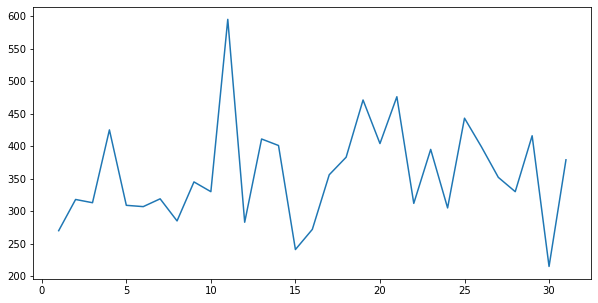

In [50]:
plt.figure(figsize=(10,5))
daily_growth_series.plot()

In [39]:
daily_growth_series = pd.to_numeric(daily_growth_series)

In [41]:
daily_growth_series.describe()

count     31.000000
mean     356.774194
std       78.711587
min      215.000000
25%      308.000000
50%      345.000000
75%      402.500000
max      595.000000
Name: DailyGrowthCases, dtype: float64

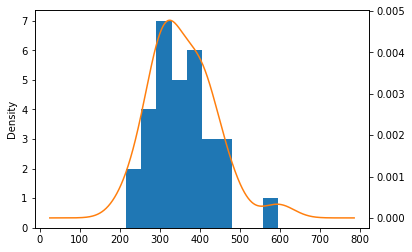

In [49]:
ax = daily_growth_series.plot(kind='hist')
daily_growth_series.plot(kind='kde', ax=ax, secondary_y=True)

Transform data into supervised learning problem. Predicting value (number of cases) at the next time (t+1) given value at the current time (t)

| t | t+1 |
| --- | --- |
| Value(t) | Value(t+1) |
| Value(t) | Value(t+1) |


In [60]:
cases = pd.DataFrame(daily_growth_series.values)
daily_cases_lag_1 = pd.concat([cases.shift(1), cases], axis=1)
daily_cases_lag_1.columns = ['t', 't+1']

In [62]:
daily_cases_lag_1.head(5)

,t,t+1
0,NaN,270
1,270.0,318
2,318.0,313
3,313.0,425
4,425.0,309


In [64]:
daily_cases_lag_1 =  daily_cases_lag_1.dropna()

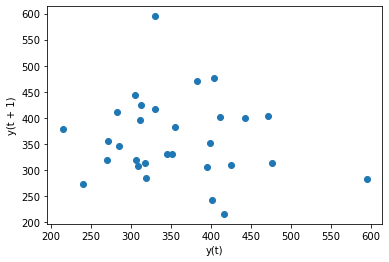

In [71]:
pd.plotting.lag_plot(cases)

In [133]:
data_prepared_poland_start = prepare_europe_data(data=data_raw, start_date='4/1/20', end_date='8/1/20', country='Poland')

In [134]:
df1 = data_prepared_poland_start
df1 = df1.T
df1.columns = df1.iloc[0]
df1 = df1.drop(df1.index[0])
df1 = df1.rename({'Poland': 'PolandConfirmedCases'}, axis=1)

In [135]:
df1['CasesShifted'] = df1['PolandConfirmedCases'].shift(1, axis=0)
df1['DailyGrowthCases'] = df1['PolandConfirmedCases']-df1['CasesShifted']

In [136]:
df1_cases = df1['DailyGrowthCases']

In [142]:
df1_cases = pd.to_numeric(df1_cases)

In [143]:
df1_cases.describe()

count    122.000000
mean     358.950820
std       96.956994
min      193.000000
25%      294.500000
50%      343.000000
75%      400.750000
max      658.000000
Name: DailyGrowthCases, dtype: float64

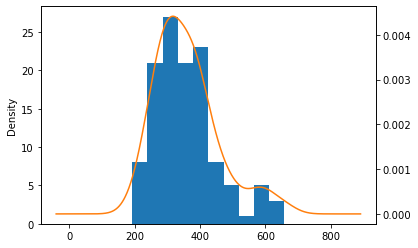

In [144]:
ax = df1_cases.plot(kind='hist')
df1_cases.plot(kind='kde', ax=ax, secondary_y=True)

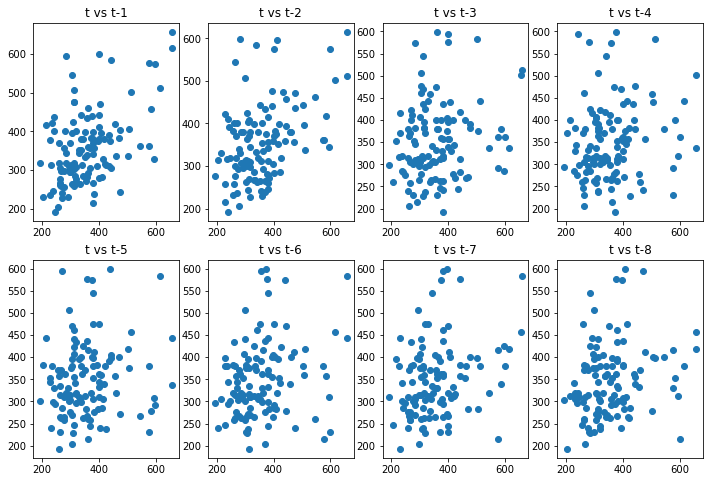

In [148]:
df1_cases = df1_cases.dropna()
values = pd.DataFrame(df1_cases.values)
lags = 8
columns = [values]
for i in range(1,(lags+1)):
    columns.append(values.shift(i))
df1_lags = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags+1)):
    columns.append('t-'+str(i))
df1_lags.columns = columns
plt.figure(figsize=(12,8))
for i in range(1, (lags+1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=df1_lags['t'].values, y=df1_lags['t-'+str(i)].values)
plt.show()

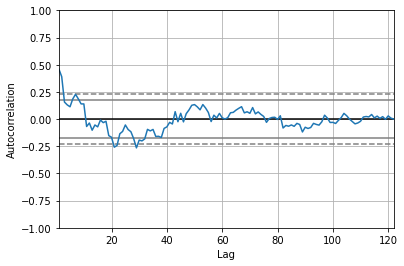

In [152]:
pd.plotting.autocorrelation_plot(df1_cases.values)

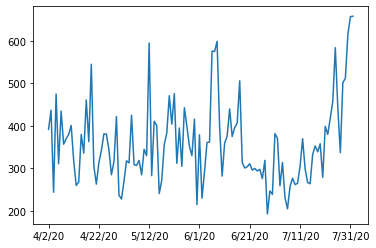

In [154]:
df1_cases.plot()

In [103]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

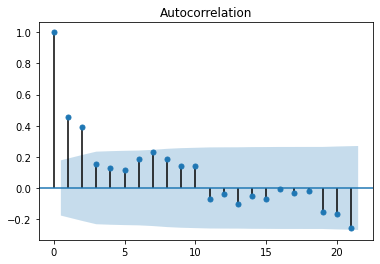

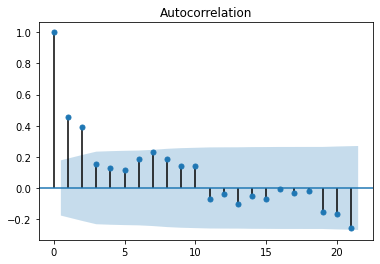

In [151]:
plot_acf(df1_cases.values)